<a href="https://colab.research.google.com/github/victorbeltrao12/Data_science_main/blob/master/Analisando_os_Dados_do_Airbnb_(Barcelona).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Barcelona*

<center><img alt="Barcelona City" width="50%" src="https://image.freepik.com/fotos-gratis/vista-aerea-de-cidade-barcelona-e-plaza-espanya-espanha_48663-25.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**.  Ah, o mas incrivel é que ele **não possui nenhum hotel**!

> Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa simples e confortavel.

>No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

  >Possuindo escritorios em **34 cidades** em todo o mundo e mais de **14.000 microcasas, 4.900 castelos e 2.400 casas em arvore** ja anunciadas em sua plataforma.

 > Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="25%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

---
**Neste *notebook*, iremos analisar os dados referentes à cidade Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**



## Obtenção dos Dados
  >Todos os dados demostrados a seguir foram obtidos no site inside Airbnb.

>Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* listings.csv - Summary information and metrics for listings in Barcelona (good for visualisations).


In [8]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-05-11/visualisations/listings.csv")

## Análise dos Dados
>Nesta parte do projeto temos por objetivo criar inicialmente uma consciencia situacional e permitir dessa maneira o entendimento de comos os dados estao sendo estruturados

**Dicionário das variáveis**

* *id* - número de id gerado para identificar o imóvel.

* *name* - nome da propriedade anunciada.

* *host_id* - número de id do proprietário (anfitrião) da propriedade.

* *host_name* - Nome do anfitrião.

* *neighbourhood_group* - esta coluna não contém nenhum valor válido.

* *neighbourhood* - nome do bairro.

* *latitude* - coordenada da latitude da propriedade.

* *longitude* - coordenada da longitude da propriedade.

* *room_type* - informa o tipo de quarto que é oferecido.

* *price* - preço para alugar o imóvel.

* *minimum_nights* - quantidade mínima de noites para reservar.

* *number_of_reviews* - número de reviews que a propriedade possui.

* *last_review* - data do último review.

* *reviews_per_month* - quantidade de reviews por mês.

* *calculated_host_listings_count* - quantidade de imóveis do mesmo anfitrião.

* *availability_365* - número de dias de disponibilidade dentro de 365 dias.

>Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.


In [10]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38077,2.17551,Private room,60,3,2,2017-11-06,0.05,3,90
1,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.47,2,345
2,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,58,1,188,2020-03-09,1.67,29,337
3,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40928,2.16112,Entire home/apt,66,1,94,2020-03-07,0.83,29,331
4,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,140,2,63,2020-02-22,0.59,6,329


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [12]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variaveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20858
Variaveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

>A qualidade de um *dataset* esta diretamente relacionada a sua quantidade de valores ausentes. e importante entender logo no inicio se estes valores nulos sao de alguma forma significativos comparados com o total de entradas.
 - As variaveis **reviews_per_month,** e **Last_review** possuem alguns de seus valores nulos.
 - As variaveis **name** e **host_name** tem algo em torno de 0,1% de seus valores nulos

In [13]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.256352
last_review                       0.256352
name                              0.000719
host_name                         0.000288
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
>Para a melhor visualizacao e identificacao, irei fazer a distribuicao das variaveis em forma de histograma.

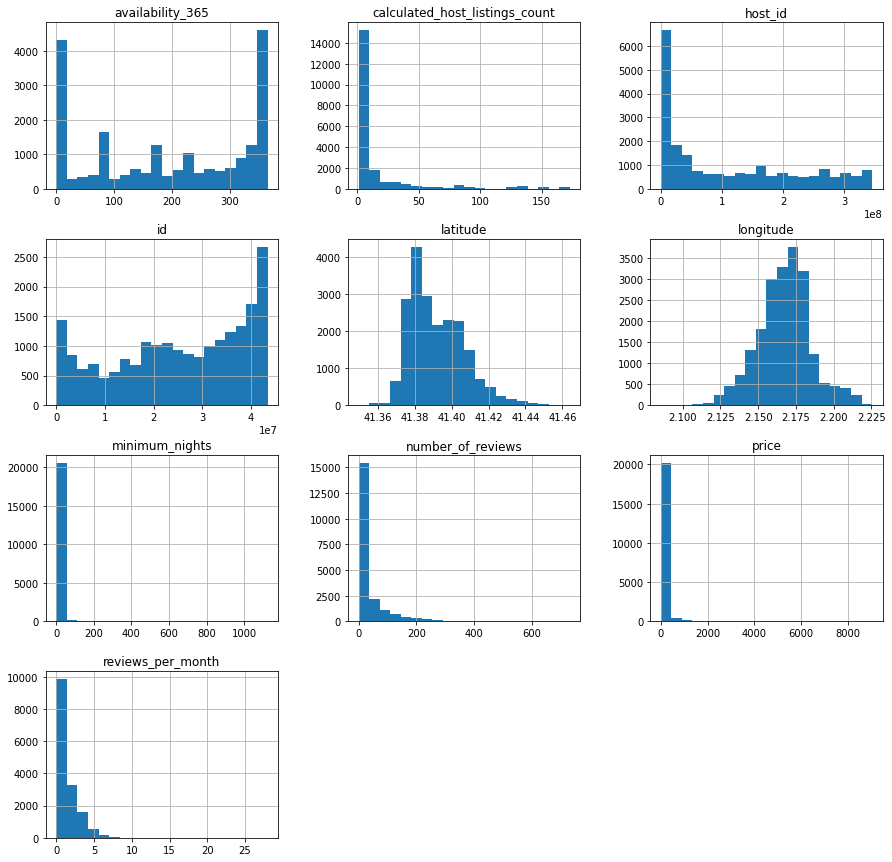

In [14]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15,15));

### **Q4. Há *outliers* presentes?**
> Pelo que se pode analisar atraves da distribuicao do histograma, e possivel verificar a presenca de *outliers*. Olhando como exemplo as variaveis **price, minimum_lights, e calculated_host_listings_count**.

> Os valores nao seguem uma distruicao e distorcem toda a representacao grafica do histograma. para se fazer a confirmacao podemos utilizar duas maneiras rapidas que auxiliarao a deteccao de *outliers*. sendo elas:
 - Resumo estatistico por medio do metodo describe()
 - Plotar **boxplots** para a variavel.

In [15]:
# Visualizando o resumo estatistico das variaveis numericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20858.000000,20858.000000,20858.000000,15511.000000,20858.000000,20858.000000
mean,124.210711,9.916051,34.655336,1.369111,14.880142,193.537540
std,405.947246,20.589782,64.189641,1.439218,31.028560,137.941732
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,36.000000,1.000000,0.000000,0.290000,1.000000,69.000000
50%,59.000000,2.000000,6.000000,0.870000,3.000000,203.000000
75%,100.000000,6.000000,39.000000,2.070000,11.000000,339.000000
max,9034.000000,1124.000000,731.000000,27.980000,173.000000,365.000000


>Olhando este resumo estatistico logo acima, podemos assim confirmar algumas hipoteses como:
 - A variavel **price** possui 75% o valor abaixo de 100, porem seu valor maximo chega a 9034.
 - A quantidade minima de noites (**minimum_nights**) esta muito acima de 365 dias no ano.

## Boxplot para minimum_night

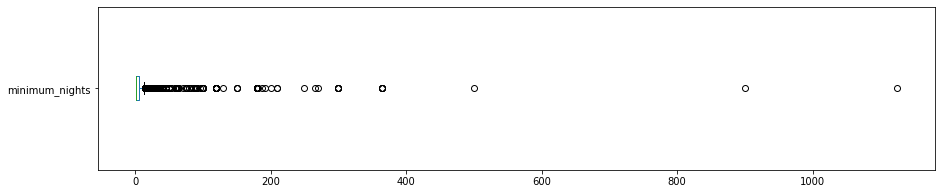


Price: valores acima de 1500
130 entradas
0.6233%


In [16]:
# minimum_nights
df.minimum_nights.plot(kind = 'box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 1500 para Price
print("\nPrice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0]* 100)))


Histogramas agora sem a presenca de *Outliers*
> Ja que conseguimos identificar *outliers* nas variaveis **price** e **minimum_nights**, vamos fazer a limpeza do *DataFrame* e plotar novamente o histograma.

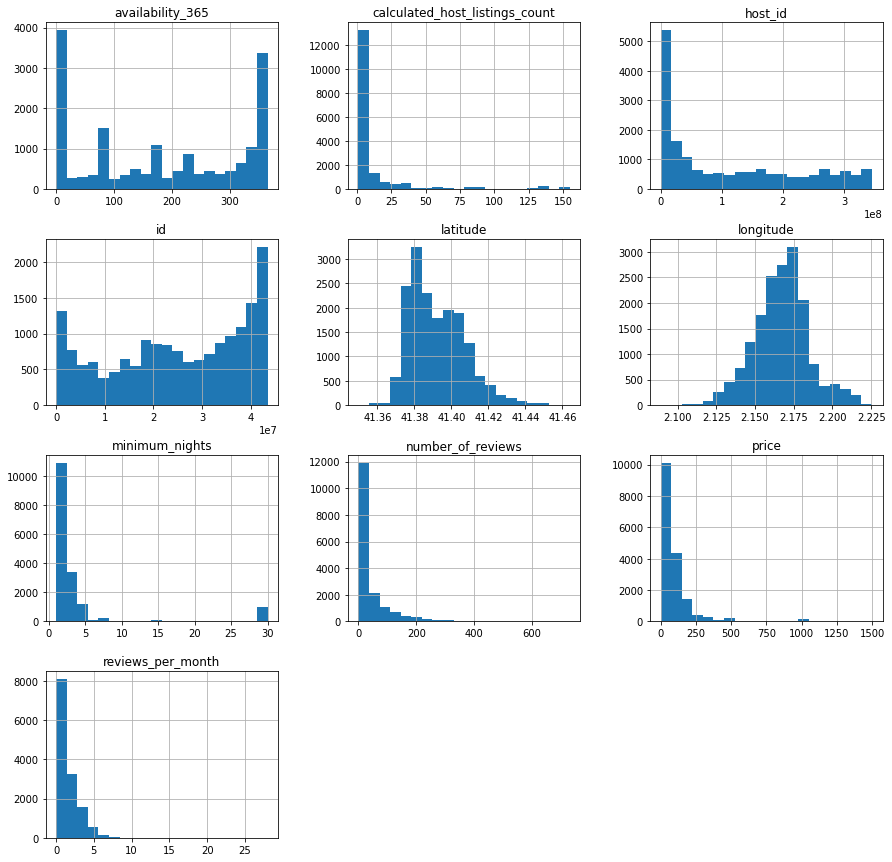

In [17]:
# Removendo os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis= 0, inplace = True)

# Removendo 'Neighbourhood_group (Estamos removendo essa coluna pois ela nao agregara dados a nossa analise)
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

#plotar o novo histograma para as variaveis numericas
df_clean.hist(bins = 20, figsize = (15,15));

### **Q5. Qual a média dos preços de aluguel?**
>A media dos precos de alugueis pode chegar a 124 Euros.

In [23]:
# ver a média da coluna `price'
df[['price']].mean()

price    124.210711
dtype: float64

### **Q6. Qual a correlação existente entre as variáveis**
> A correlacao e o significado da existencia de uma relacao entre duas ou mais coisas. neste contexto, estamos buscando uma relacao ou semelhanca entre duas variaveis.
Essa relacao pode ser medida e e funcao do coeficiente de correlacao estabelecer qual a intensidade dela. Para a indetificacao das possiveis correlacoes existentes entre as variaveis de possivel interesse vamos fazer duas coisas:
 - 1) Criar uma matriz de correlacao
 - 2) Gerar um *heatmap* a partir desta matriz, usando as propriedades da biblioteca *Seaborn*

In [25]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(df_clean.corr())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.642201,-0.029401,0.021402,0.000037,0.103376,-0.549378,-0.074701,0.015886,-0.056672
host_id,0.642201,1.000000,-0.023299,0.036040,-0.011759,-0.012697,-0.327565,-0.005017,-0.148096,-0.067962
latitude,-0.029401,-0.023299,1.000000,0.335591,-0.022571,0.053099,-0.031201,-0.064125,-0.017718,0.016533
longitude,0.021402,0.036040,0.335591,1.000000,0.028868,-0.000482,0.004430,0.019129,-0.030778,-0.026656
price,0.000037,-0.011759,-0.022571,0.028868,1.000000,-0.066339,-0.030853,-0.039553,0.130505,0.198310
minimum_nights,0.103376,-0.012697,0.053099,-0.000482,-0.066339,1.000000,-0.120136,-0.145199,-0.034301,0.069378
number_of_reviews,-0.549378,-0.327565,-0.031201,0.004430,-0.030853,-0.120136,1.000000,0.696890,-0.089427,0.128951
reviews_per_month,-0.074701,-0.005017,-0.064125,0.019129,-0.039553,-0.145199,0.696890,1.000000,-0.117209,0.067440
calculated_host_listings_count,0.015886,-0.148096,-0.017718,-0.030778,0.130505,-0.034301,-0.089427,-0.117209,1.000000,0.248550
availability_365,-0.056672,-0.067962,0.016533,-0.026656,0.198310,0.069378,0.128951,0.067440,0.248550,1.000000


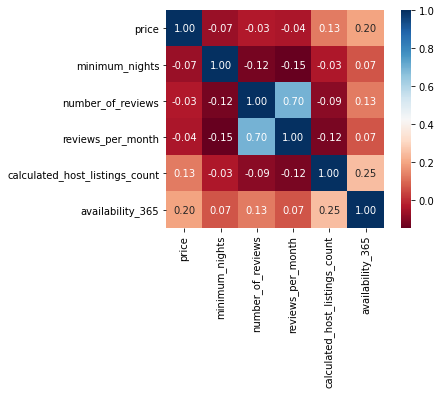

In [26]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
> A coluna da variavel *room_type* indica o tipo de locacao que esta sendo anunciada no site da Airbnb. Se por um acaso voce ja navegou pelo site, voce sabe que existem opcoes de apartamento/casas e outras formas de aluguel.
Vamos avaliar a quantidade de ocorrencias para cada tipo de aluguel.

In [28]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       9869
Entire home/apt    6664
Hotel room          402
Shared room         235
Name: room_type, dtype: int64

In [27]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.574782
Entire home/apt    0.388119
Hotel room         0.023413
Shared room        0.013687
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**
>Para se verificar uma variavel em funcao da outra foi usado a funcao **Group By**, neste caso quero comparar a vizinhaca (neighbourhood) com base no seu preco de locacao.


In [22]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Diagonal Mar i el Front Marítim del Poblenou    226.768750
Vallcarca i els Penitents                       201.115385
la Vila Olímpica del Poblenou                   183.549451
la Dreta de l'Eixample                          176.719621
Vallvidrera, el Tibidabo i les Planes           163.333333
la Marina del Prat Vermell                      147.666667
Pedralbes                                       126.650000
la Vila de Gràcia                               122.287596
el Poblenou                                     121.190361
les Tres Torres                                 119.678571
Name: price, dtype: float64

> Logo acima podemos ver que os bairros **Diagonal mar i el Front Maritim del Poblenou, Vallcarca i els Penitents, La vila Olimpica del Poblenou**, estao com precos acima da media.
Para uma pessoa leiga que esta indo para Barcelona pela primeira vez poderia muito bem alugar um lugar nessas 3 localizacoes sem questionar se haveria um lugar mais barato nas redondezas.


> Como são fornecidas as Latitudes e Longitudes dos imóveis, é possível plotar cada ponto. Para isso, vamos considera x=longitude e y=latitude.

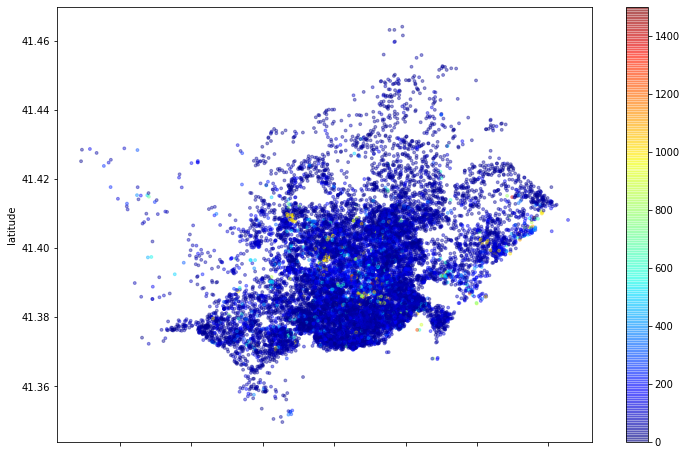

In [35]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
> A media minima de noites para se alugar e de 4 noites.

In [36]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

4.037623762376238

## Conclusões


> Foram feitas apenas algumas analises superficiais na base de dados disponibilizada pelo Airbnb, Porem conseguimos perceber que existem alguns *outliers* em algumas das variaveis.

> Barcelona utiliza os seguintes parâmetros:

> Uma métrica de alta disponibilidade e filtro de 90 dias por ano
Um filtro frequentemente alugado de 90 dias por ano
Uma taxa de revisão de 50% para o número de convidados que fazem uma reserva e deixam uma revisão
Uma reserva média de 3 noites, a menos que um mínimo maior de noites seja configurado para uma listagem.
Uma taxa máxima de ocupação de 70% para garantir que o modelo de ocupação não produza resultados artificialmente elevados com base nos dados disponíveis

> Tambem pode se perceber que algumas localidades ha poucos imoveis disponiveis e pois a cidade de Barcelona tem suas proprias leis a respeito de estadias turisticas, a lei catala exige que as casas utilizadas sejam registradas na secretaria de turismo da catala antes do inicio da operacao. o numero de registros deve ser afixado ao anunciar a residencia. 
Devido esta lei foram feitas analises e perceberam que "casas/apartamentos inteiros" e "quartos privados" em Barcelona em 3 de janeiro de 2016, mostra que 78% (11.520 em 14.699 listagens) não possuem número de licença afixado e provavelmente não possuem licença e são ilegais, isso causa uma distorcao das informacoes estatisticas de alguns atributos.

> Em julho de 2014, a Airbnb foi multada em 30 mil euros, juntamente com outros 7 sites da internet, por uma violação "grave" das leis locais.

> O *Inside Airbnb* fornece dados compilados a partir do site da Airbnb para listagens disponíveis para Barcelona. Um modelo conservador de ocupação foi construído a fim de estimar as Taxas de Ocupação, Renda por Mês e Noites por Ano. Mais informações sobre a metodologia do modelo de ocupação podem ser encontradas nos avisos de isenção de responsabilidade.

> Por fim, venho lhe lembrar que o *dataset* utilizado nesta analise e uma versao resumida, ideal apenas para uma abordagem inicial.

